In [2]:
import os
import numpy as np
import cv2
path = 'flowers/'
types = os.listdir(path)
images = []
labels = []
img_size = 224

for item in types:
    files = os.listdir(path+str(item)+'/')
    for i in files:
        #print(path+str(item)+'/'+str(i))
        img = cv2.imread(path+str(item)+'/'+str(i))
        img = cv2.resize(img,(img_size,img_size))
        images.append(img)
        labels.append(item)
images = np.array(images)
images = images.astype('float32')/255

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

: 

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [4]:
le = LabelEncoder()
y = le.fit_transform(labels)
y = y.reshape(-1,1)
oe = OneHotEncoder()
Y =  oe.fit_transform(y)

In [5]:
Y = Y.toarray()
Y.shape

(1821, 2)

In [6]:
print(images.shape)
print(Y.shape)

(1821, 224, 224, 3)
(1821, 2)


In [11]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, Y = shuffle(images,Y,random_state=4)
train_x,test_x,train_y,test_y = train_test_split(images,Y,test_size=0.1,random_state=420)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1638, 224, 224, 3)
(1638, 2)
(183, 224, 224, 3)
(183, 2)


In [13]:
#!pip install pydot

In [19]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
#from keras.utils import layer_utils
from keras.utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow


In [20]:
from keras.applications.resnet50 import ResNet50

model = ResNet50()
model.summary()

2024-01-12 17:20:38.265935: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-12 17:20:38.355617: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-12 17:20:38.355661: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-12 17:20:38.358586: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-12 17:20:38.358628: I external/local_xla/xla/stream_executor

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │       0 │ -                    │
│ (InputLayer)        │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1_pad           │ (None, 230, 230,  │       0 │ input_layer[0][0]    │
│ (ZeroPadding2D)     │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │   9,472 │ conv1_pad[0][0]      │
│                     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1_bn            │ (None, 112, 112,  │     256 │ conv1_conv[0][0]     │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1_relu          │ (None, 112, 112,  │       0 │ conv1_bn[0][0]       │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ pool1_pad           │ (None, 114, 114,  │       0 │ conv1_relu[0][0]     │
│ (ZeroPadding2D)     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ pool1_pool          │ (None, 56, 56,    │       0 │ pool1_pad[0][0]      │
│ (MaxPooling2D)      │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │   4,160 │ pool1_pool[0][0]     │
│ (Conv2D)            │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │     256 │ conv2_block1_1_conv… │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │       0 │ conv2_block1_1_bn[0… │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │  36,928 │ conv2_block1_1_relu… │
│ (Conv2D)            │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │     256 │ conv2_block1_2_conv… │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │       0 │ conv2_block1_2_bn[0… │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │  16,640 │ pool1_pool[0][0]     │
│ (Conv2D)            │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │  16,640 │ conv2_block1_2_relu… │
│ (Conv2D)            │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │   1,024 │ conv2_block1_0_conv… │
│ (BatchNormalizatio… │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │   1,024 │ conv2_block1_3_conv

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [25]:
def indentity_block(X,filters,f=3):
    f1,f2,f3 = filters
    X_short = X
    
    X = Conv2D(filters=f1,kernel_size=(1,1),strides=(1,1),padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=f2,kernel_size=(f,f),strides=(1,1),padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=f3,kernel_size=(1,1),strides=(1,1),padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    
    X = Add()([X,X_short])
    X = Activation('relu')(X)
    
    return X
    

In [32]:
def convolution_block(X,filters,f=3, s=2):
    f1,f2,f3 = filters
    X_short = X
    
    X = Conv2D(filters=f1,kernel_size=(1,1),strides=(s,s),padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=f2,kernel_size=(f,f),strides=(1,1),padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=f3,kernel_size=(1,1),strides=(1,1),padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    
    X_short = Conv2D(filters=f3,kernel_size=(1,1),strides=(s,s),padding='valid')(X_short)
    X_short = BatchNormalization(axis=3)(X_short)
    
    X = Add()([X,X_short])
    X = Activation('relu')(X)
    
    return X

In [37]:
def My_ResNet50(input_shape=(224,224,3),classes=2):
    #input
    X_input = Input(input_shape)
    
    #zero padding
    X = ZeroPadding2D((3,3))(X_input)
    
    #conv2d
    X = Conv2D(filters=64,kernel_size=(7,7),strides=(2,2))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides=(2,2))(X)
    
    #stage 2
    X = convolution_block(X,filters=[64,64,256],f=3,s=1)
    X = indentity_block(X,filters=[64,64,256],f=3)
    X = indentity_block(X,filters=[64,64,256],f=3)
    
    #stage 3
    X = convolution_block(X,filters=[128,128,512],s=2)
    X = indentity_block(X,filters=[128,128,512],f=3)
    X = indentity_block(X,filters=[128,128,512],f=3)
    
    #stage 4
    X = convolution_block(X,filters=[256,256,1024],s=2)
    X = indentity_block(X,filters=[256,256,1024],f=3)
    X = indentity_block(X,filters=[256,256,1024],f=3)
    X = indentity_block(X,filters=[256,256,1024],f=3)
    X = indentity_block(X,filters=[256,256,1024],f=3)
    X = indentity_block(X,filters=[256,256,1024],f=3)
    
    #stage 5
    X = convolution_block(X,filters=[512,512,2048],s=2)
    X = indentity_block(X,filters=[512,512,2048],f=3)
    X = indentity_block(X,filters=[512,512,2048],f=3)
    
    X = AveragePooling2D(pool_size=(1,1),strides=(2,2))(X)
    X = Flatten()(X)
    X = Dense(classes,activation='softmax',kernel_initializer=glorot_uniform(seed=0))(X)
    
    model = Model(inputs=X_input,outputs=X)
    
    return model
    

In [38]:
model = My_ResNet50(input_shape=(224,224,3),classes=2)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │       0 │ -                    │
│ (InputLayer)        │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ zero_padding2d_5    │ (None, 230, 230,  │       0 │ input_layer_6[0][0]  │
│ (ZeroPadding2D)     │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_145 (Conv2D) │ (None, 112, 112,  │   9,472 │ zero_padding2d_5[0]… │
│                     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │     256 │ conv2d_145[0][0]     │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ activation_128      │ (None, 112, 112,  │       0 │ batch_normalization… │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ max_pooling2d_5     │ (None, 55, 55,    │       0 │ activation_128[0][0] │
│ (MaxPooling2D)      │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_146 (Conv2D) │ (None, 55, 55,    │   4,160 │ max_pooling2d_5[0][… │
│                     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 55, 55,    │     256 │ conv2d_146[0][0]     │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ activation_129      │ (None, 55, 55,    │       0 │ batch_normalization… │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_147 (Conv2D) │ (None, 55, 55,    │  36,928 │ activation_129[0][0] │
│                     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 55, 55,    │     256 │ conv2d_147[0][0]     │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ activation_130      │ (None, 55, 55,    │       0 │ batch_normalization… │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_148 (Conv2D) │ (None, 55, 55,    │  16,640 │ activation_130[0][0] │
│                     │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_149 (Conv2D) │ (None, 55, 55,    │  16,640 │ max_pooling2d_5[0][… │
│                     │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 55, 55,    │   1,024 │ conv2d_148[0][0]     │
│ (BatchNormalizatio… │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 55, 55,    │   1,024 │ conv2d_149[0][0]     │
│ (BatchNormalizatio… │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ add_42 (Add)        │ (None, 55, 55,    │       0 │ batch_normalization

 Total params: 23,370,882 (89.15 MB)

 Trainable params: 23,319,298 (88.96 MB)

 Non-trainable params: 51,584 (201.50 KB)

In [39]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
import tensorflow as tf

In [45]:
with tf.device('/GPU:0'):
    model.fit(train_x,train_y,epochs=10,batch_size=32)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6927 - loss: 5.5772
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6118 - loss: 3.7584
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6533 - loss: 2.2990
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7282 - loss: 2.0895
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.5988 - loss: 1.8912
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6386 - loss: 1.1332
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6907 - loss: 1.1885
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7229 - loss: 0.7659
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7165 - loss: 0.9178
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7058 - loss: 0.7644


In [46]:
preds = model.evaluate(test_x,test_y)
print("Loss = "+str(preds[0]))
print("test accuracy = "+str(preds[1]))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4686 - loss: 2.5607
Loss = 2.4791572093963623
test accuracy = 0.48087432980537415


input shpae:  (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[0. 1.]]


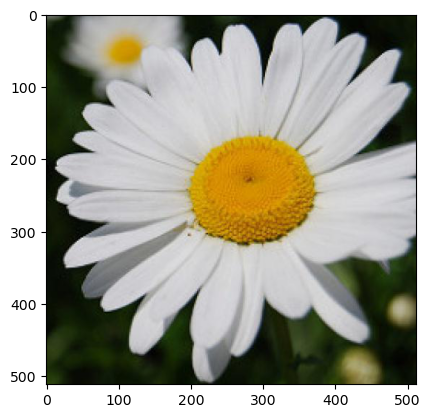

In [48]:
from matplotlib.pyplot import imread
img_path = 'flowers.jpg'
img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)
print('input shpae: ',x.shape)
my_image = imread(img_path)
imshow(my_image)
print(model.predict(x))